In [55]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import pickle

In [56]:
ds=pd.read_csv("FashionDataset.csv")
ds

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women
...,...,...,...,...,...,...,...,...
30753,21,swarovski,crystal stylish womens rodhium earrings,Nan,Nan,8950,Nan,Jewellery-Women
30754,22,Nan,Nan,Nan,Nan,Nan,Nan,Jewellery-Women
30755,23,jewelz,ethnic gold plated jhumki earrings,Nan,Rs\n1839,643,65% off,Jewellery-Women
30756,24,estelle,womens gold plated double line fancy white and...,Nan,Nan,2799,Nan,Jewellery-Women


In [57]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30758 non-null  int64 
 1   BrandName   30758 non-null  object
 2   Deatils     30758 non-null  object
 3   Sizes       30758 non-null  object
 4   MRP         30758 non-null  object
 5   SellPrice   30758 non-null  object
 6   Discount    30758 non-null  object
 7   Category    30758 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


In [58]:
print(ds.duplicated().sum())

1331


In [59]:
ds=ds.drop_duplicates()

In [60]:
print(ds.duplicated().sum())

0


In [61]:
# Taking input values for x
x = ds[["SellPrice", "Discount"]]

In [62]:
import pandas as pd
import re

# Keep only numeric part of Discount
def extract_discount(value):
    match = re.search(r'\d+', str(value))  # extract numbers like "50" from "50% off"
    return float(match.group()) if match else None

ds["Discount"] = ds["Discount"].apply(extract_discount)

In [63]:
ds = ds.dropna(subset=["Discount", "SellPrice"])

In [64]:
x = ds[["SellPrice", "Discount"]]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

In [65]:
y_kmeans = kmeans.fit_predict(x)

In [66]:
print(y_kmeans)

[2 0 2 ... 2 2 2]


In [67]:
y_kmeans

array([2, 0, 2, ..., 2, 2, 2])

In [68]:
# making cluster table
result = pd.DataFrame(data=y_kmeans, columns=['Cluster'])
result

,Cluster
0,2
1,0
2,2
3,0
4,2
...,...
22408,2
22409,2
22410,2
22411,2


In [69]:
# join x data and cluster type data
data = pd.concat([x, result], axis=1)

In [70]:
print(data.dtypes)

SellPrice     object
Discount     float64
Cluster      float64
dtype: object


In [71]:
data["SellPrice"] = pd.to_numeric(data["SellPrice"].astype(str).str.replace("₹", "").str.replace(",", ""), errors='coerce')

<Axes: xlabel='SellPrice', ylabel='Discount'>

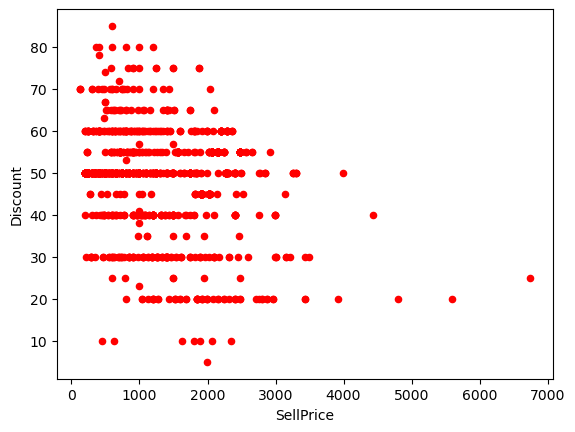

In [72]:
data[data['Cluster'] == 1].plot.scatter(x="SellPrice", y="Discount", color='red')

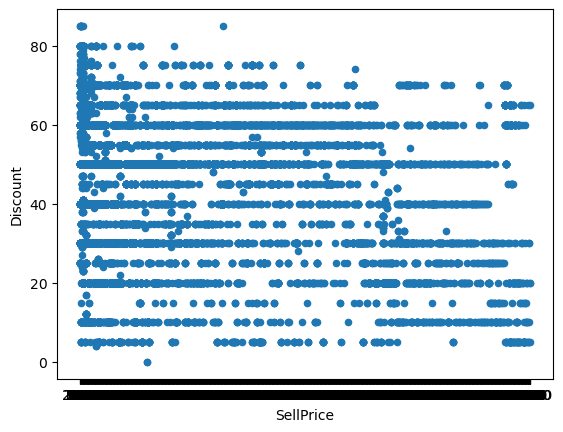

In [73]:
# plotting variables of x
x.plot(kind='scatter', x="SellPrice", y="Discount")
plt.show()

In [74]:
kmeans.predict([[849, 40]])

array([2])

<Axes: xlabel='SellPrice', ylabel='Discount'>

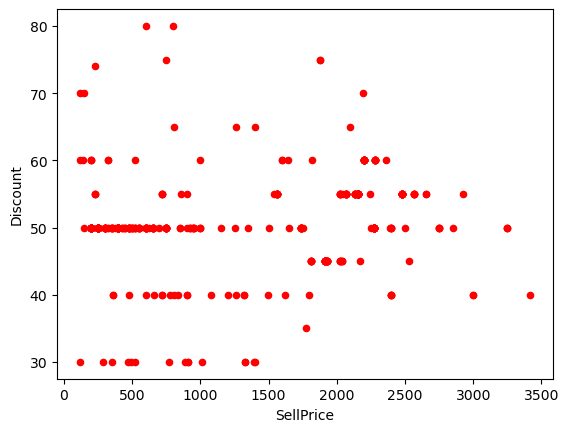

In [75]:
# getting specific cluster list visualization
data[data['Cluster'] == 3].plot(kind='scatter', x="SellPrice", y="Discount", color='red')

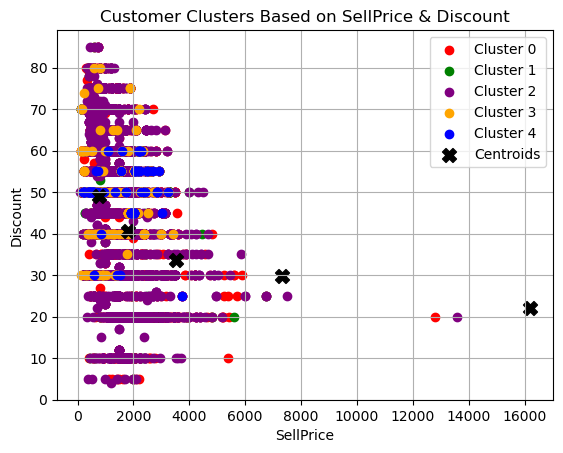

In [76]:
import matplotlib.pyplot as plt

colors = ['red', 'green', 'purple', 'orange', 'blue']

# Clusterwise visualization with centroids
for i in range(0, 5):
    cluster = data[data['Cluster'] == i]
    plt.scatter(cluster["SellPrice"], cluster["Discount"], color=colors[i], label=f"Cluster {i}")

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', s=100, marker='X', label='Centroids')

plt.xlabel("SellPrice")
plt.ylabel("Discount")
plt.title("Customer Clusters Based on SellPrice & Discount")
plt.legend()
plt.grid(True)
plt.show()

In [77]:
# User Input
print("Enter new product details to predict its cluster:")

sell_price = float(input("Enter Sell Price (₹): "))
discount = float(input("Enter Discount (%): "))

# Predict the cluster for new product
predicted_cluster = kmeans.predict([[sell_price, discount]])[0]

print(f"The product belongs to cluster {predicted_cluster}")

Enter new product details to predict its cluster:


Enter Sell Price (₹):  799
Enter Discount (%):  20


The product belongs to cluster 2


In [78]:
# Save model using pickle
with open("Mall_Clustering_Prediction.pkl", "wb") as f:
    pickle.dump(kmeans, f)

print("✅ Model trained and saved as 'Product_Cluster_Model.pkl'")

✅ Model trained and saved as 'Product_Cluster_Model.pkl'
